# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- Nama: Isham Fakhri Rahman
- Email: ishamfakhri01@gmail.com
- Id Dicoding : isham_fakhri

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Berapa rata-rata pengguna dalam setiap bulan?
- pertanyaan 2 : Apakah cuaca memiliki pengaruh yang signifikan pada jumlah pengguna?
- pertanyaan 3 : Apakah perbedaan hari menyebabkan perbedaan jumlah pengguna?

## Menyiapkan semua library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
daily_df = pd.read_csv("data/day.csv", delimiter=",")
hourly_df = pd.read_csv("data/hour.csv", delimiter=",")

### Assessing Data

In [5]:
# assessing dataframe daily_df
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
daily_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
daily_df.duplicated().sum()

0

In [8]:
daily_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# assessing dataframe hourly_df

hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hourly_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hourly_df.duplicated().sum()

0

In [12]:
hourly_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [13]:
# tidak ditemukan data yang perlu dibersihkan

## Exploratory Data Analysis (EDA)

### Explore daily_df

In [14]:
# melihat jumlah dan rata-rata pengguna setiap bulan

daily_df.groupby(by=["yr","mnth"]).agg({
    "casual": ["sum", "mean"],
    "registered": ["sum", "mean"],
    "cnt": ["sum", "mean"]
})

casual              registered                  cnt             
           sum         mean        sum         mean     sum         mean
yr mnth                                                                 
0  1      3073    99.129032      35116  1132.774194   38189  1231.903226
   2      6242   222.928571      41973  1499.035714   48215  1721.964286
   3     12826   413.741935      51219  1652.225806   64045  2065.967742
   4     22346   744.866667      72524  2417.466667   94870  3162.333333
   5     31050  1001.612903     104771  3379.709677  135821  4381.322581
   6     30612  1020.400000     112900  3763.333333  143512  4783.733333
   7     36452  1175.870968     104889  3383.516129  141341  4559.387097
   8     28842   930.387097     107849  3479.000000  136691  4409.387097
   9     26545   884.833333     100873  3362.433333  127418  4247.266667
   10    25222   813.612903      98289  3170.612903  123511  3984.225806
   11    15594   519.800000      86573  2885.766667  102167  3405.566667
   12     8448   272.516129      78875  2544.354839   87323  2816.870968
1  1      8969   289.322581      87775  2831.451613   96744  3120.774194
   2      8721   300.724138      94416  3255.724138  103137  3556.448276
   3     31618  1019.935484     133257  4298.612903  164875  5318.548387
   4     38456  1281.866667     135768  4525.600000  174224  5807.466667
   5     44235  1426.935484     151630  4891.290323  195865  6318.225806
   6     43294  1443.133333     159536  5317.866667  202830  6761.000000
   7     41705  1345.322581     161902  5222.645161  203607  6567.967742
   8     43197  1393.451613     171306  5526.000000  214503  6919.451613
   9     43778  1459.266667     174795  5826.500000  218573  7285.766667
   10    34538  1114.129032     164303  5300.096774  198841  6414.225806
   11    21009   700.300000     131655  4388.500000  152664  5088.800000
   12    13245   427.258065     110468  3563.483871  123713  3990.741935

In [15]:
# melihat jumlah dan rata-rata pengguna bulanan

monthly_user_df = daily_df.groupby(by=["yr","mnth"], as_index=False).agg({
     "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

# mengconvert nilai rata-rata pengguna dari float menjadi integer

monthly_user_df['casual'] = monthly_user_df['casual'].astype('int')
monthly_user_df['registered'] = monthly_user_df['registered'].astype('int')
monthly_user_df['cnt'] = monthly_user_df['cnt'].astype('int')
monthly_user_df

,yr,mnth,casual,registered,cnt
0,0,1,99,1132,1231
1,0,2,222,1499,1721
2,0,3,413,1652,2065
3,0,4,744,2417,3162
4,0,5,1001,3379,4381
5,0,6,1020,3763,4783
6,0,7,1175,3383,4559
7,0,8,930,3479,4409
8,0,9,884,3362,4247
9,0,10,813,3170,3984


In [16]:
# melihat urutan hari paling banyak pengguna menggunakan rata2 perhari pada setiap bulan

daily_user_df = daily_df.groupby(by=["yr","mnth", "weekday"], as_index=False).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).sort_values(by="cnt", ascending=False)

daily_user_df.groupby(by="weekday").agg({
  "cnt": "mean"
})


,cnt
weekday,
0,4227.172917
1,4351.033333
2,4505.372917
3,4521.779167
4,4651.545833
5,4682.854167
6,4572.843750


In [17]:
# melihat pengaruh musim terhadap jumlah pengguna berdasarkan season

daily_df.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

# => hasil = berdasarkan data tahun 2011 dan 2012 terdapat pola yang sama pada tiap musim, yakni 4 2 1 3 dan 4 2 1 3


casual  registered     cnt
yr season                            
0  1        21425      128575  150000
   2        77564      269752  347316
   3        95450      324200  419650
   4        52813      273324  326137
1  1        39197      282151  321348
   2       125958      445315  571273
   3       130641      510838  641479
   4        76969      438507  515476

In [18]:
# melihat pengaruh cuaca terhadap jumlah pengguna berdasarkan weathersit

daily_df.groupby(by=["yr", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

# => hasil = berdasarkan data tahun 2011 dan 2012 menunjukkan bahwa secara berurutan cuaca 1, 2, dan 3 mempengaruhi jumlah pengguna


casual  registered      cnt
yr weathersit                             
0  1           177272      657795   835067
   2            67987      314937   382924
   3             1993       23119    25112
1  1           269074     1153811  1422885
   2           101789      512145   613934
   3             1902       10855    12757

In [19]:
# memvalidasi pengaruh cuaca dan musim terhadap pengguna dengan menggabungkan kedua variabel

daily_df.groupby(by=["yr", "season", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

# => hasil = data yang didapatkan sesuai dan tepat dengan kedua pengkategorian berdasarkan season dan weathersit


casual  registered     cnt
yr season weathersit                            
0  1      1            16540       82995   99535
          2             4805       44531   49336
          3               80        1049    1129
   2      1            50941      169382  220323
          2            26323       98190  124513
          3              300        2180    2480
   3      1            71488      237662  309150
          2            23487       80465  103952
          3              475        6073    6548
   4      1            38303      167756  206059
          2            13372       91751  105123
          3             1138       13817   14955
1  1      1            25022      187479  212501
          2            13974       92263  106237
          3              201        2409    2610
   2      1            95447      311216  406663
          2            30391      133192  163583
          3              120         907    1027
   3      1            96457      393836  490293
          2            32920      113807  146727
          3             1264        3195    4459
   4      1            52148      261280  313428
          2            24504      172883  197387
          3              317        4344    4661

In [20]:
# menghitung perbedaan jumlah pengguna pada workingday dan non-workingday(weekend & holiday)

daily_df.groupby(by=["yr","mnth","workingday"]).agg({
    "cnt": ["sum", "mean", "count"]
})

# => hasil = data yang didapatkan menunjukkan bahwa jumlah pengguna pada non-workingday (bernilai 0) mendekati nilai jumlah pengguna pada workingday (bernilai 1) meskipun jumlah hari non-workingday hanya sekitar 1/3 dari total hari sebulan. Ini artinya rata2 harian pengguna non-workingday lebih tinggi dibanding pada workingday

cnt                   
                       sum         mean count
yr mnth workingday                           
0  1    0            11180  1016.363636    11
        1            27009  1350.450000    20
   2    0            14614  1623.777778     9
        1            33601  1768.473684    19
   3    0            17008  2126.000000     8
        1            47037  2045.086957    23
   4    0            32055  3205.500000    10
        1            62815  3140.750000    20
   5    0            44469  4446.900000    10
        1            91352  4350.095238    21
   6    0            40044  5005.500000     8
        1           103468  4703.090909    22
   7    0            52921  4811.000000    11
        1            88420  4421.000000    20
   8    0            30562  3820.250000     8
        1           106129  4614.304348    23
   9    0            42384  4709.333333     9
        1            85034  4049.238095    21
   10   0            44289  4026.272727    11
        1            79222  3961.100000    20
   11   0            33544  3354.400000    10
        1            68623  3431.150000    20
   12   0            23769  2376.900000    10
        1            63554  3026.380952    21
1  1    0            29837  2712.454545    11
        1            66907  3345.350000    20
   2    0            25734  2859.333333     9
        1            77403  3870.150000    20
   3    0            44849  4983.222222     9
        1           120026  5455.727273    22
   4    0            57204  5720.400000    10
        1           117020  5851.000000    20
   5    0            61382  6820.222222     9
        1           134483  6112.863636    22
   6    0            64573  7174.777778     9
        1           138257  6583.666667    21
   7    0            60597  6059.700000    10
        1           143010  6810.000000    21
   8    0            48853  6106.625000     8
        1           165650  7202.173913    23
   9    0            79980  7270.909091    11
        1           138593  7294.368421    19
   10   0            57926  6436.222222     9
        1           140915  6405.227273    22
   11   0            47326  4732.600000    10
        1           105338  5266.900000    20
   12   0            35169  3197.181818    11
        1            88544  4427.200000    20

In [21]:
# jumlah masing2 pengguna casual dan registered pada workingday dan non-workingday tiap bulan

daily_df.groupby(by=["yr", "mnth","workingday"]).agg({
    "casual": ["mean","count"],
    "registered": ["mean","count"],
    "cnt": ["sum", "mean", "count"]
})


casual         registered           cnt               \
                           mean count         mean count     sum         mean   
yr mnth workingday                                                              
0  1    0            152.727273    11   863.636364    11   11180  1016.363636   
        1             69.650000    20  1280.800000    20   27009  1350.450000   
   2    0            402.555556     9  1221.222222     9   14614  1623.777778   
        1            137.842105    19  1630.631579    19   33601  1768.473684   
   3    0            798.000000     8  1328.000000     8   17008  2126.000000   
        1            280.086957    23  1765.000000    23   47037  2045.086957   
   4    0           1207.400000    10  1998.100000    10   32055  3205.500000   
        1            513.600000    20  2627.150000    20   62815  3140.750000   
   5    0           1637.400000    10  2809.500000    10   44469  4446.900000   
        1            698.857143    21  3651.238095    21   91352  4350.095238   
   6    0           1737.250000     8  3268.250000     8   40044  5005.500000   
        1            759.727273    22  3943.363636    22  103468  4703.090909   
   7    0           1893.272727    11  2917.727273    11   52921  4811.000000   
        1            781.300000    20  3639.700000    20   88420  4421.000000   
   8    0           1308.125000     8  2512.125000     8   30562  3820.250000   
        1            799.000000    23  3815.304348    23  106129  4614.304348   
   9    0           1686.888889     9  3022.444444     9   42384  4709.333333   
        1            541.095238    21  3508.142857    21   85034  4049.238095   
   10   0           1359.000000    11  2667.272727    11   44289  4026.272727   
        1            513.650000    20  3447.450000    20   79222  3961.100000   
   11   0            917.600000    10  2436.800000    10   33544  3354.400000   
        1            320.900000    20  3110.250000    20   68623  3431.150000   
   12   0            426.700000    10  1950.200000    10   23769  2376.900000   
        1            199.095238    21  2827.285714    21   63554  3026.380952   
1  1    0            457.181818    11  2255.272727    11   29837  2712.454545   
        1            197.000000    20  3148.350000    20   66907  3345.350000   
   2    0            483.777778     9  2375.555556     9   25734  2859.333333   
        1            218.350000    20  3651.800000    20   77403  3870.150000   
   3    0           1613.333333     9  3369.888889     9   44849  4983.222222   
        1            777.181818    22  4678.545455    22  120026  5455.727273   
   4    0           2067.800000    10  3652.600000    10   57204  5720.400000   
        1            888.900000    20  4962.100000    20  117020  5851.000000   
   5    0           2692.666667     9  4127.555556     9   61382  6820.222222   
        1            909.136364    22  5203.727273    22  134483  6112.863636   
   6    0           2497.888889     9  4676.888889     9   64573  7174.777778   
        1            991.095238    21  5592.571429    21  138257  6583.666667   
   7    0           1910.400000    10  4149.300000    10   60597  6059.700000   
        1           1076.238095    21  5733.761905    21  143010  6810.000000   
   8    0           1978.500000     8  4128.125000     8   48853  6106.625000   
        1           1189.956522    23  6012.217391    23  165650  7202.173913   
   9    0           2359.363636    11  4911.545455    11   79980  7270.909091   
        1            938.157895    19  6356.210526    19  138593  7294.368421   
   10   0           1955.222222     9  4481.000000     9   57926  6436.222222   
        1            770.045455    22  5635.181818    22  140915  6405.227273   
   11   0           1173.800000    10  3558.800000    10   47326  4732.600000   
        1            463.550000    20  4803.350000    20  105338  5266.900000   
   12   0            574.363636    11  2622.818182    11

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata pengguna dalam setiap bulan?

In [22]:
first_year_user_df = monthly_user_df.head(12)
second_year_user_df = monthly_user_df.tail(12)

avg_year_user_df = monthly_user_df.groupby(by="mnth", as_index=False).agg({
     "casual": "mean",
    "registered": "mean"
})
avg_year_user_df['casual'] = avg_year_user_df['casual'].astype('int')
avg_year_user_df['registered'] = avg_year_user_df['registered'].astype('int')

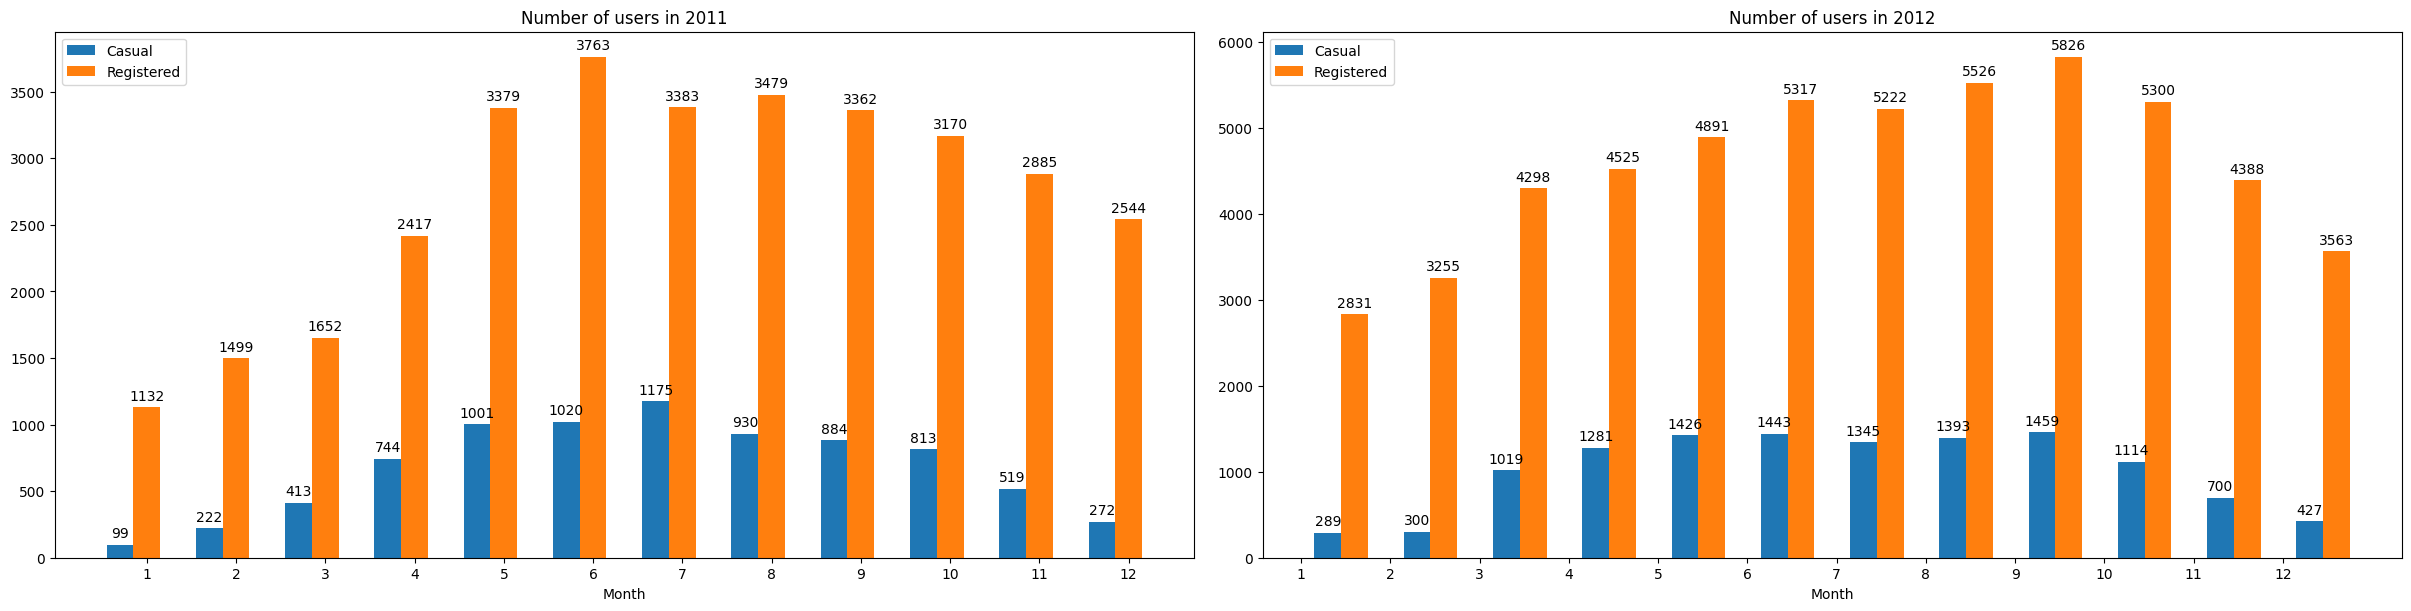

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6), layout='constrained')

# memvisualisasikan jumlah pengguna pada tahun pertama

first_year = first_year_user_df['mnth']
count_first = {
    "Casual": first_year_user_df['casual'],
    "Registered": first_year_user_df['registered']
}

# memvisualisasikan jumlah pengguna pada tahun kedua

second_year = second_year_user_df['mnth']
count_second = {
    "Casual": second_year_user_df['casual'],
    "Registered": second_year_user_df['registered']
}

x_1 = np.arange(len(first_year))
x_2 = np.arange(len(second_year))
width = 0.3
multiplier = 0

for firstyear, measurement in count_first.items():
    offset = width * multiplier
    rects = ax[0].bar(x_1 + offset, measurement, width, label=firstyear)
    ax[0].bar_label(rects, padding=3)
    multiplier += 1

ax[0].set_xlabel('Month')
ax[0].set_title('Number of users in 2011')
ax[0].set_xticks(x_1 + width, first_year)
ax[0].legend(loc='upper left')

for secondyear, measurement in count_second.items():
    offset = width * multiplier
    rects = ax[1].bar(x_2 + offset, measurement, width, label=secondyear)
    ax[1].bar_label(rects, padding=3)
    multiplier += 1

ax[1].set_xlabel('Month')
ax[1].set_title('Number of users in 2012')
ax[1].set_xticks(x_2 + width, second_year)
ax[1].legend(loc='upper left')

plt.show()

<Figure size 2500x1500 with 0 Axes>

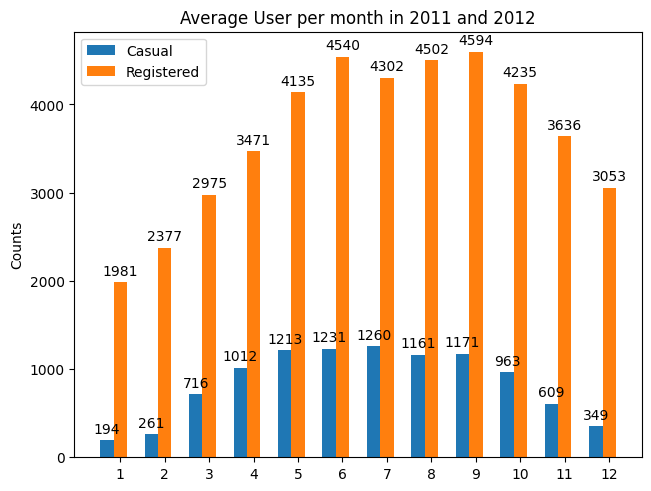

In [24]:
# memvisualisasikan rata-rata bulanan jumlah pengguna pada kedua tahun

months = avg_year_user_df['mnth']
counts = {
    "Casual": avg_year_user_df['casual'],
    "Registered": avg_year_user_df['registered']
}

x = np.arange(len(months))
width = 0.3
multiplier = 0

plt.figure(figsize=(25, 15))
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in counts.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Counts')
ax.set_title('Average User per month in 2011 and 2012')
ax.set_xticks(x + width, months)
ax.legend(loc='upper left')

plt.show()

### Pertanyaan 2: Apakah cuaca memiliki pengaruh yang signifikan pada jumlah pengguna?

In [25]:
# rata-rata pengguna dua tahun terakhir berdasarkan cuaca

byweathersit_df = daily_df.groupby(by="weathersit", as_index = False).cnt.mean().sort_values(by='cnt', ascending=False)

byweathersit_df['weathersit'] = byweathersit_df['weathersit'].replace([1, 2, 3], ['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Light Rain'])
byweathersit_df

,weathersit,cnt
0,Clear/Partly Cloudy,4876.786177
1,Mist/Cloudy,4035.862348
2,Light Snow/Light Rain,1803.285714


C:\Users\isham\AppData\Local\Temp\ipykernel_13568\761982021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 1000x500 with 0 Axes>

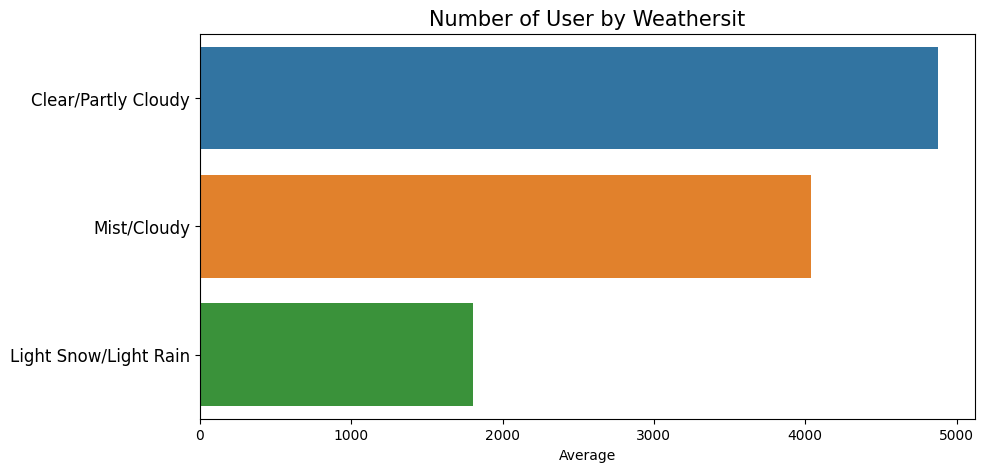

In [26]:
plt.figure(figsize=(10, 5))

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    x="cnt",
    y="weathersit",
    data=byweathersit_df.sort_values(by="cnt", ascending=False),
    palette="tab10",
    orient='h',
    ax=ax)
ax.set_title("Number of User by Weathersit", loc="center", fontsize=15)
ax.set_ylabel(None)
ax.set_xlabel('Average')
ax.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3: Apakah perbedaan hari menyebabkan perbedaan jumlah pengguna?

In [27]:
# hari dengan user terbanyak berdasarkan rata-rata 2 tahun terakhir

byday_df = daily_df.groupby(by="weekday", as_index=False).cnt.mean().sort_values(by="cnt", ascending=False)

byday_df['weekday'] = byday_df['weekday'].replace([0, 1, 2, 3, 4, 5, 6],['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
byday_df

,weekday,cnt
5,Friday,4690.288462
4,Thursday,4667.259615
6,Saturday,4550.542857
3,Wednesday,4548.538462
2,Tuesday,4510.663462
1,Monday,4338.123810
0,Sunday,4228.828571


C:\Users\isham\AppData\Local\Temp\ipykernel_13568\156016251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weekday", data=byday_df, palette=colors, ax=ax[0], orient='h')
C:\Users\isham\AppData\Local\Temp\ipykernel_13568\156016251.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="cnt", y="weekday", data=byday_df.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1], orient='h')


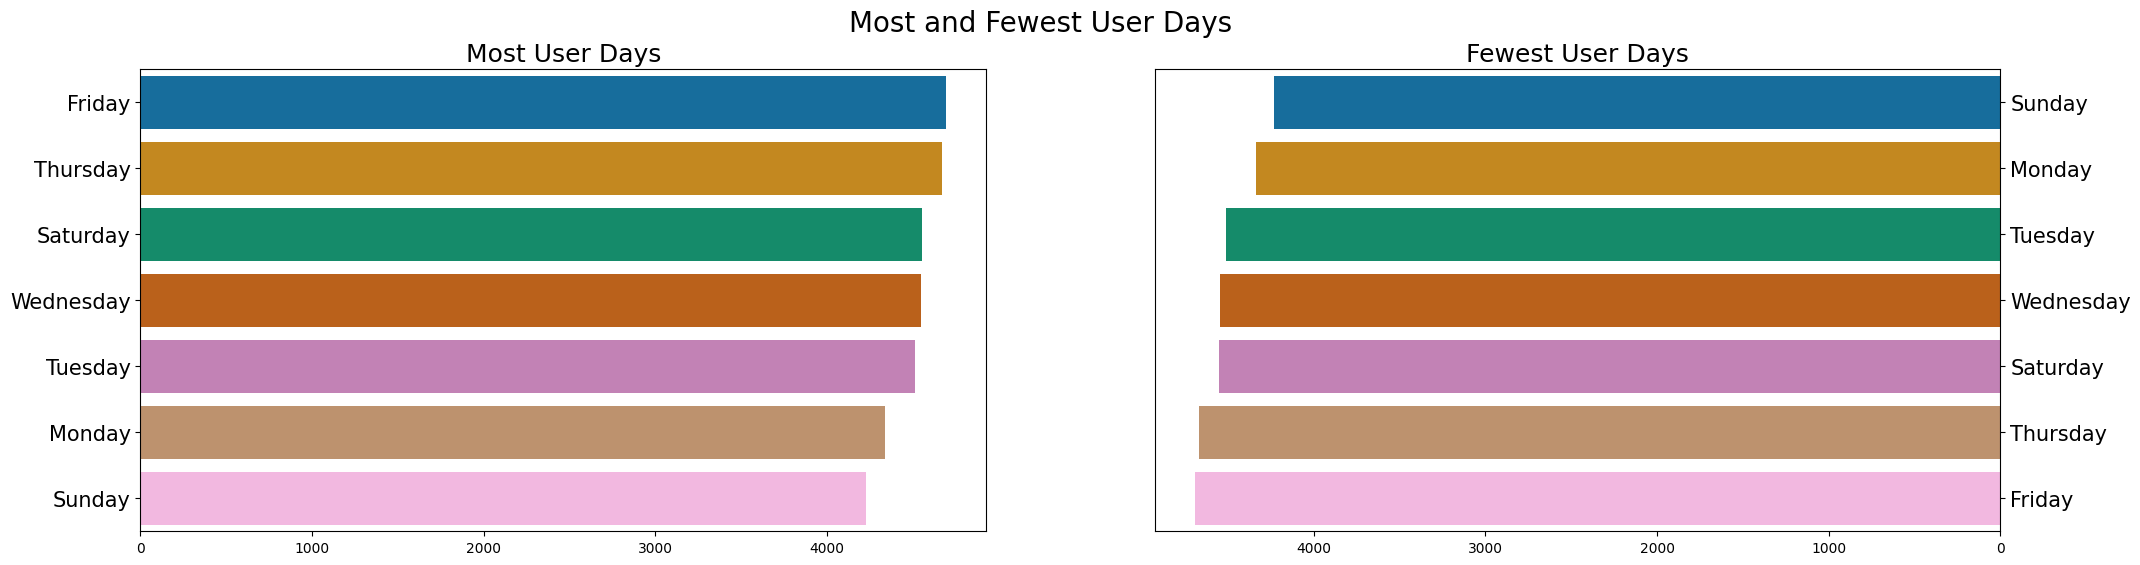

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = "colorblind"

sns.barplot(x="cnt", y="weekday", data=byday_df, palette=colors, ax=ax[0], orient='h')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most User Days", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="cnt", y="weekday", data=byday_df.sort_values(by="cnt", ascending=True), palette=colors, ax=ax[1], orient='h')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Fewest User Days", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and Fewest User Days", fontsize=20)
plt.show()

## Conclusion

- Kesimpulan dari visualisasi pertanyaan 1: jumlah user pada tahun pertama dan kedua bervariasi, namun dapat disimpulkan bahwa jumlah registered user jauh lebih banyak dibandingkan dengan casual user. Selain itu, rata-rata pengguna dengan jumlah paling banyak berada pada rentang bulan ke 6-9.

- Kesimpulan dari visualisasi pertanyaan 2: Kondisi cuaca mempengaruhi jumlah pengguna yang menyewa. Pengguna cenderung menyewa sepeda ketika cuaca cerah, dan lebih sedikit ketika cuaca sedang tidak cerah bersih, bahkan tidak ada pengguna yang menyewa sepeda ketika cuaca sedang ekstrim.

- Kesimpulan dari visualisasi pertanyaan 3: Perbedaan hari tidak terlalu memperlihatkan perbedaan signifikan pada jumlah pengguna. dapat disimpulkan bahwa hari berpengaruh kecil pada jumlah pengguna.